### The climate model output can be retrieved via the same methods we worked through in unit5_models --- please refer back to that tutorial for working with CMIP6 data on Google Cloud Store and make the appropriate selection in the catalog to get your GFDL-ESM4 data that is required for the project.

In [133]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import zarr  # to read in Zarr format
import gcsfs # to read google cloud data
import momlevel as ml
import cftime
import cmocean
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [116]:
xr.set_options(display_style='html')
%matplotlib inline                           
%config InlineBackend.figure_format='retina' 
plt.rcParams['figure.figsize'] = 12,6  

In [3]:
google_cloud_cmip6 = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')

In [4]:
google_cloud_cmip6

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,ps,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
1,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rsds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
2,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlus,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
3,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
4,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,psl,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
...,...,...,...,...,...,...,...,...,...,...,...
523769,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,tas,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207
523770,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,tauu,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207
523771,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,hur,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207
523772,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,hus,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207


### Beginning of CM4 OMON

In [6]:
gfdl_cm4_H_tos_data = google_cloud_cmip6.query(
    "source_id == 'GFDL-CM4' & \
    table_id == 'Amon' & \
    variable_id == 'tas' & \
    experiment_id == 'historical' & \
    member_id == 'r1i1p1f1' & \
    grid_label == 'gr1' "
)

In [7]:
gfdl_cm4_H_tos_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
8074,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,Amon,tas,gr1,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/histo...,NaN,20180701


In [8]:
gfdl_cm4_24_tos_data = google_cloud_cmip6.query(
    "source_id == 'GFDL-CM4' & \
     table_id == 'Amon' & \
    variable_id == 'tas' & \
    experiment_id == 'ssp245' & \
    member_id == 'r1i1p1f1' & \
    grid_label == 'gr1' "
)

In [9]:
gfdl_cm4_24_tos_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
2249,ScenarioMIP,NOAA-GFDL,GFDL-CM4,ssp245,r1i1p1f1,Amon,tas,gr1,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-CM...,NaN,20180701


In [10]:
gfdl_cm4_54_tos_data = google_cloud_cmip6.query(
    "source_id == 'GFDL-CM4' & \
    table_id == 'Amon' & \
    variable_id == 'tas' & \
    experiment_id == 'ssp585' & \
    member_id == 'r1i1p1f1' & \
    grid_label == 'gr1' "
)

In [11]:
gfdl_cm4_54_tos_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
866,ScenarioMIP,NOAA-GFDL,GFDL-CM4,ssp585,r1i1p1f1,Amon,tas,gr1,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-CM...,NaN,20180701


### Beginning of ESM4 OMON

In [47]:
gfdl_ESM4_h_data = google_cloud_cmip6.query(
    "source_id == 'GFDL-ESM4' & \
    table_id == 'Amon' & \
    variable_id == 'tas' & \
    experiment_id == 'historical' & \
    member_id == 'r1i1p1f1' & \
    grid_label == 'gr1' "
)

In [48]:
gfdl_ESM4_h_data 

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
244695,CMIP,NOAA-GFDL,GFDL-ESM4,historical,r1i1p1f1,Amon,tas,gr1,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/hist...,NaN,20190726


In [49]:
gfdl_esm4_tos_58_data = google_cloud_cmip6.query(
    "source_id == 'GFDL-ESM4' & \
    table_id == 'Amon' & \
    variable_id == 'tas' & \
    experiment_id == 'ssp585' & \
    member_id == 'r1i1p1f1' & \
    grid_label == 'gr1' "
)

In [50]:
gfdl_esm4_tos_58_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
19008,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp585,r1i1p1f1,Amon,tas,gr1,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701


In [51]:
gfdl_esm4_tos_24_data = google_cloud_cmip6.query(
    "source_id == 'GFDL-ESM4' & \
    table_id == 'Amon' & \
    variable_id == 'tas' & \
    experiment_id == 'ssp245' & \
    member_id == 'r1i1p1f1' & \
    grid_label == 'gr1' "
)

In [52]:
gfdl_esm4_tos_24_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
15454,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp245,r1i1p1f1,Amon,tas,gr1,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701


### Beginning of NCARR OMON

In [51]:
NCAR_CESM2_tos_24_data = google_cloud_cmip6.query(
    "source_id == 'CESM2-WACCM' & \
    table_id == 'Amon' & \
    variable_id == 'tas' & \
    experiment_id == 'ssp245' & \
    member_id == 'r1i1p1f1' "
)

In [154]:
NCAR_CESM2_tos_24_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
249726,ScenarioMIP,NCAR,CESM2-WACCM,ssp245,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/ScenarioMIP/NCAR/CESM2-WACCM/...,NaN,20190815


In [52]:
NCAR_CESM2_tos_58_data = google_cloud_cmip6.query(
    "source_id == 'CESM2-WACCM' & \
    table_id == 'Amon' & \
    variable_id == 'tas' & \
    experiment_id == 'ssp585' & \
    member_id == 'r1i1p1f1' "
)

In [155]:
NCAR_CESM2_tos_58_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
458559,ScenarioMIP,NCAR,CESM2-WACCM,ssp585,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/ScenarioMIP/NCAR/CESM2-WACCM/...,NaN,20200702


In [55]:
NCAR_CESM2_h_data = google_cloud_cmip6.query(
    "source_id == 'CESM2-WACCM' & \
    table_id == 'Amon' & \
    variable_id == 'tas' & \
    experiment_id == 'historical' & \
    member_id == 'r1i1p1f1' "
)

In [156]:
NCAR_CESM2_h_data 

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
56326,CMIP,NCAR,CESM2-WACCM,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2-WACCM/histori...,NaN,20190227


# Beginning of load in 2

### Load in for GFDL CM4

In [12]:
gfdl_cm4_H_tao_data = google_cloud_cmip6.query(
    "source_id == 'GFDL-CM4' & \
    variable_id == 'ta' & \
    table_id == 'Amon' & \
    experiment_id == 'historical' & \
    member_id == 'r1i1p1f1' "
)

In [157]:
gfdl_cm4_H_tao_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
6728,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,Amon,ta,gr1,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/histo...,NaN,20180701


In [13]:
gfdl_cm4_245_tao_data =  google_cloud_cmip6.query(
    "source_id == 'GFDL-CM4' & \
    table_id == 'Amon' & \
    variable_id == 'ta' & \
    experiment_id == 'ssp245' & \
    member_id == 'r1i1p1f1'  "
)

In [158]:
gfdl_cm4_245_tao_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
2250,ScenarioMIP,NOAA-GFDL,GFDL-CM4,ssp245,r1i1p1f1,Amon,ta,gr1,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-CM...,NaN,20180701


In [14]:
gfdl_cm4_54_tao_data = google_cloud_cmip6.query(
    "source_id == 'GFDL-CM4' & \
    table_id == 'Amon' & \
    variable_id == 'ta' & \
    experiment_id == 'ssp585' & \
    member_id == 'r1i1p1f1'  "
)

In [159]:
gfdl_cm4_54_tao_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
850,ScenarioMIP,NOAA-GFDL,GFDL-CM4,ssp585,r1i1p1f1,Amon,ta,gr1,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-CM...,NaN,20180701


### Load in ESM4

In [53]:
gfdl_ESM4_H_tao_data = google_cloud_cmip6.query(
    "source_id == 'GFDL-ESM4' & \
    table_id == 'Amon' & \
    variable_id == 'ta' & \
    experiment_id == 'historical' & \
    member_id == 'r1i1p1f1'  "
)

In [54]:
gfdl_ESM4_H_tao_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
244701,CMIP,NOAA-GFDL,GFDL-ESM4,historical,r1i1p1f1,Amon,ta,gr1,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/hist...,NaN,20190726


In [55]:
gfdl_ESM4_245_tao_data = google_cloud_cmip6.query(
    "source_id == 'GFDL-ESM4' & \
    table_id == 'Amon' & \
    variable_id == 'ta' & \
    experiment_id == 'ssp245' & \
    member_id == 'r1i1p1f1' "
)

In [56]:
gfdl_ESM4_245_tao_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
15395,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp245,r1i1p1f1,Amon,ta,gr1,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701


In [57]:
gfdl_ESM4_585_tao_data = google_cloud_cmip6.query(
    "source_id == 'GFDL-ESM4' & \
    table_id == 'Amon' & \
    variable_id == 'ta' & \
    experiment_id == 'ssp585' & \
    member_id == 'r1i1p1f1' "
)

In [58]:
gfdl_ESM4_585_tao_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
19007,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp585,r1i1p1f1,Amon,ta,gr1,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701


### Load In NCAR

In [79]:
NCAR_CESM2_585_tao_data = google_cloud_cmip6.query(
    "source_id == 'CESM2-WACCM' & \
    table_id == 'Amon' & \
    variable_id == 'ta' & \
    experiment_id == 'ssp585' & \
    member_id == 'r1i1p1f1' "
)

In [163]:
NCAR_CESM2_585_tao_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
458594,ScenarioMIP,NCAR,CESM2-WACCM,ssp585,r1i1p1f1,Amon,ta,gn,gs://cmip6/CMIP6/ScenarioMIP/NCAR/CESM2-WACCM/...,NaN,20200702


In [81]:
NCAR_CESM2_245_tao_data = google_cloud_cmip6.query(
    "source_id == 'CESM2-WACCM' & \
    table_id == 'Amon' & \
    variable_id == 'ta' & \
    experiment_id == 'ssp245' & \
    member_id == 'r1i1p1f1' "
)

In [164]:
NCAR_CESM2_245_tao_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
249724,ScenarioMIP,NCAR,CESM2-WACCM,ssp245,r1i1p1f1,Amon,ta,gn,gs://cmip6/CMIP6/ScenarioMIP/NCAR/CESM2-WACCM/...,NaN,20190815


In [252]:
NCAR_CESM2_H_tao_data = google_cloud_cmip6.query(
    "source_id == 'CESM2-WACCM' & \
    table_id == 'Amon' & \
    variable_id == 'ta' & \
    experiment_id == 'historical' & \
    member_id == 'r1i1p1f1'  "
)

In [253]:
NCAR_CESM2_H_tao_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
56327,CMIP,NCAR,CESM2-WACCM,historical,r1i1p1f1,Amon,ta,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2-WACCM/histori...,NaN,20190227


## Load In 3

In [26]:
NCAR_CESM2_H_fx_data = google_cloud_cmip6.query(
    "source_id == 'CESM2-WACCM' & \
    table_id == 'fx' & \
    variable_id == 'sftlf' & \
    experiment_id == 'historical' & \
    member_id == 'r1i1p1f1'  "
)

In [25]:
NCAR_CESM2_H_fx_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
55980,CMIP,NCAR,CESM2-WACCM,historical,r1i1p1f1,fx,sftlf,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2-WACCM/histori...,NaN,20190227


In [59]:
gfdl_ESM4_h_fx_data = google_cloud_cmip6.query(
    "source_id == 'GFDL-ESM4' & \
    table_id == 'fx' & \
    experiment_id == 'land-hist' & \
    variable_id == 'sftlf' & \
    member_id == 'r1i1p1f1' "
)

In [60]:
gfdl_ESM4_h_fx_data 

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
19688,LUMIP,NOAA-GFDL,GFDL-ESM4,land-hist,r1i1p1f1,fx,sftlf,gr1,gs://cmip6/CMIP6/LUMIP/NOAA-GFDL/GFDL-ESM4/lan...,NaN,20180701


In [21]:
gfdl_CM4_h_fx_data = google_cloud_cmip6.query(
    "source_id == 'GFDL-CM4' & \
    table_id == 'fx' & \
    experiment_id == 'historical' & \
    variable_id == 'sftlf' & \
    grid_label == 'gr1' &\
    member_id == 'r1i1p1f1' "
)

In [23]:
gfdl_CM4_h_fx_data 

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
9517,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,fx,sftlf,gr1,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/histo...,NaN,20180701


# Convert to zarr

In [31]:
gcs = gcsfs.GCSFileSystem(token='anon')

In [32]:
zstore_gfdl_cm4_H_tos = gfdl_cm4_H_tos_data.zstore.values[-1]

In [33]:
zstore_gfdl_cm4_H_tos

'gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/historical/r1i1p1f1/Amon/tas/gr1/v20180701/'

In [34]:
# create a mutable-mapping-style interface to the store
mapper_gfdl_cm4_H_tos = gcs.get_mapper(zstore_gfdl_cm4_H_tos)
# open the dataset using xarray and zarr
gfdl_cm4_H_tos = xr.open_zarr(mapper_gfdl_cm4_H_tos, 
                                consolidated=True,use_cftime=True).tas.rename({'lat':'latitude',
                                                             'lon':'longitude'})
gfdl_cm4_H_tos

<xarray.DataArray 'tas' (time: 1980, latitude: 180, longitude: 288)>
dask.array<open_dataset-tas, shape=(1980, 180, 288), dtype=float32, chunksize=(600, 180, 288), chunktype=numpy.ndarray>
Coordinates:
    height     float64 ...
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * longitude  (longitude) float64 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
  * time       (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    interp_method:  conserve_order2
    long_name:      Near-Surface Air Temperature
    original_name:  tas
    standard_name:  air_temperature
    units:          K

In [36]:
zstore_gfdl_cm4_24_tos = gfdl_cm4_24_tos_data.zstore.values[-1]

In [37]:
zstore_gfdl_cm4_24_tos 

'gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-CM4/ssp245/r1i1p1f1/Amon/tas/gr1/v20180701/'

In [38]:
# create a mutable-mapping-style interface to the store
mapper_gfdl_cm4_24_tos = gcs.get_mapper(zstore_gfdl_cm4_24_tos )
# open the dataset using xarray and zarr
gfdl_cm4_24_tos = xr.open_zarr(mapper_gfdl_cm4_24_tos, 
                                consolidated=True,use_cftime=True).tas.rename({'lat':'latitude',
                                                             'lon':'longitude'})
gfdl_cm4_24_tos

<xarray.DataArray 'tas' (time: 1032, latitude: 180, longitude: 288)>
dask.array<open_dataset-tas, shape=(1032, 180, 288), dtype=float32, chunksize=(600, 180, 288), chunktype=numpy.ndarray>
Coordinates:
    height     float64 ...
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * longitude  (longitude) float64 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    interp_method:  conserve_order2
    long_name:      Near-Surface Air Temperature
    original_name:  tas
    standard_name:  air_temperature
    units:          K

In [39]:
zstore_gfdl_cm4_54_to = gfdl_cm4_54_tos_data.zstore.values[-1]

In [40]:
zstore_gfdl_cm4_54_to 

'gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-CM4/ssp585/r1i1p1f1/Amon/tas/gr1/v20180701/'

In [41]:
# create a mutable-mapping-style interface to the store
mapper_gfdl_cm4_54_to = gcs.get_mapper(zstore_gfdl_cm4_54_to )
# open the dataset using xarray and zarr
gfdl_cm4_54_to = xr.open_zarr(mapper_gfdl_cm4_54_to, 
                                consolidated=True,use_cftime=True).tas.rename({'lat':'latitude',
                                                             'lon':'longitude'})
gfdl_cm4_54_to

<xarray.DataArray 'tas' (time: 1032, latitude: 180, longitude: 288)>
dask.array<open_dataset-tas, shape=(1032, 180, 288), dtype=float32, chunksize=(600, 180, 288), chunktype=numpy.ndarray>
Coordinates:
    height     float64 ...
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * longitude  (longitude) float64 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    interp_method:  conserve_order2
    long_name:      Near-Surface Air Temperature
    original_name:  tas
    standard_name:  air_temperature
    units:          K

In [61]:
zstore_gfdl_ESM4_h = gfdl_ESM4_h_data.zstore.values[-1]

In [62]:
zstore_gfdl_ESM4_h

'gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/historical/r1i1p1f1/Amon/tas/gr1/v20190726/'

In [63]:
# create a mutable-mapping-style interface to the store
mapper_gfdl_ESM4_h_to = gcs.get_mapper(zstore_gfdl_ESM4_h )
# open the dataset using xarray and zarr
gfdl_ESM4_h_to = xr.open_zarr(mapper_gfdl_ESM4_h_to, 
                                consolidated=True,use_cftime=True).tas.rename({'lat':'latitude',
                                                             'lon':'longitude'})
gfdl_ESM4_h_to

<xarray.DataArray 'tas' (time: 1980, latitude: 180, longitude: 288)>
dask.array<open_dataset-tas, shape=(1980, 180, 288), dtype=float32, chunksize=(600, 180, 288), chunktype=numpy.ndarray>
Coordinates:
    height     float64 ...
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * longitude  (longitude) float64 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
  * time       (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    interp_method:  conserve_order2
    long_name:      Near-Surface Air Temperature
    original_name:  tas
    standard_name:  air_temperature
    units:          K

In [69]:
zstore_gfdl_esm4_tos_58 = gfdl_esm4_tos_58_data.zstore.values[-1]

In [179]:
zstore_gfdl_esm4_tos_58

'gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ESM4/ssp585/r1i1p1f1/Amon/tas/gr1/v20180701/'

In [70]:
# create a mutable-mapping-style interface to the store
mapper_gfdl_esm4_tos_58 = gcs.get_mapper(zstore_gfdl_esm4_tos_58)
# open the dataset using xarray and zarr
gfdl_esm4_tos_58 = xr.open_zarr(mapper_gfdl_esm4_tos_58, 
                                consolidated=True,use_cftime=True).tas.rename({'lat':'latitude',
                                                             'lon':'longitude'})
gfdl_esm4_tos_58

<xarray.DataArray 'tas' (time: 1032, latitude: 180, longitude: 288)>
dask.array<open_dataset-tas, shape=(1032, 180, 288), dtype=float32, chunksize=(862, 180, 288), chunktype=numpy.ndarray>
Coordinates:
    height     float64 ...
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * longitude  (longitude) float64 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    interp_method:  conserve_order2
    long_name:      Near-Surface Air Temperature
    original_name:  tas
    standard_name:  air_temperature
    units:          K

In [71]:
zstore_gfdl_esm4_tos_24 = gfdl_esm4_tos_24_data.zstore.values[-1]

In [67]:
zstore_gfdl_esm4_tos_24

'gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ESM4/ssp245/r1i1p1f1/Amon/tas/gr1/v20180701/'

In [72]:
# create a mutable-mapping-style interface to the store
mapper_gfdl_esm4_tos_24 = gcs.get_mapper(zstore_gfdl_esm4_tos_24)
# open the dataset using xarray and zarr
gfdl_esm4_tos_24 = xr.open_zarr(mapper_gfdl_esm4_tos_24, 
                                consolidated=True,use_cftime=True).tas.rename({'lat':'latitude',
                                                             'lon':'longitude'})
gfdl_esm4_tos_24

<xarray.DataArray 'tas' (time: 1032, latitude: 180, longitude: 288)>
dask.array<open_dataset-tas, shape=(1032, 180, 288), dtype=float32, chunksize=(862, 180, 288), chunktype=numpy.ndarray>
Coordinates:
    height     float64 ...
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * longitude  (longitude) float64 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    interp_method:  conserve_order2
    long_name:      Near-Surface Air Temperature
    original_name:  tas
    standard_name:  air_temperature
    units:          K

In [182]:
zstore_NCAR_CESM2_tos_24 = NCAR_CESM2_tos_24_data.zstore.values[-1]

In [183]:
zstore_NCAR_CESM2_tos_24

'gs://cmip6/CMIP6/ScenarioMIP/NCAR/CESM2-WACCM/ssp245/r1i1p1f1/Amon/tas/gn/v20190815/'

In [232]:
# create a mutable-mapping-style interface to the store
mapper_NCAR_CESM2_tos_24 = gcs.get_mapper(zstore_NCAR_CESM2_tos_24)
# open the dataset using xarray and zarr
NCAR_CESM2_tos_24= xr.open_zarr(mapper_NCAR_CESM2_tos_24, 
                                consolidated=True,use_cftime=True).tas.rename({'lat':'latitude',
                                                             'lon':'longitude'})
NCAR_CESM2_tos_24

<xarray.DataArray 'tas' (time: 1032, latitude: 192, longitude: 288)>
dask.array<open_dataset-tas, shape=(1032, 192, 288), dtype=float32, chunksize=(600, 192, 288), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * longitude  (longitude) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * time       (time) object 2015-01-15 12:00:00 ... 2100-12-15 12:00:00
Attributes: (12/19)
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    comment:        TREFHT
    description:    near-surface (usually, 2 meter) air temperature
    frequency:      mon
    id:             tas
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Near-Surface Air Temperature
    type:           real
    units:          K
    variable_id:    tas

In [184]:
zstore_NCAR_CESM2_tos_58 = NCAR_CESM2_tos_58_data.zstore.values[-1]

In [185]:
zstore_NCAR_CESM2_tos_58

'gs://cmip6/CMIP6/ScenarioMIP/NCAR/CESM2-WACCM/ssp585/r1i1p1f1/Amon/tas/gn/v20200702/'

In [233]:
# create a mutable-mapping-style interface to the store
mapper_NCAR_CESM2_tos_58 = gcs.get_mapper(zstore_NCAR_CESM2_tos_58)
# open the dataset using xarray and zarr
NCAR_CESM2_tos_58 = xr.open_zarr(mapper_NCAR_CESM2_tos_58, 
                                consolidated=True,use_cftime=True).tas.rename({'lat':'latitude',
                                                             'lon':'longitude'})
NCAR_CESM2_tos_58

<xarray.DataArray 'tas' (time: 1032, latitude: 192, longitude: 288)>
dask.array<open_dataset-tas, shape=(1032, 192, 288), dtype=float32, chunksize=(600, 192, 288), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * longitude  (longitude) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * time       (time) object 2015-01-15 12:00:00 ... 2100-12-15 12:00:00
Attributes: (12/19)
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    comment:        near-surface (usually, 2 meter) air temperature
    description:    near-surface (usually, 2 meter) air temperature
    frequency:      mon
    id:             tas
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Near-Surface Air Temperature
    type:           real
    units:          K
    variable_id:    tas

In [186]:
zstore_NCAR_CESM2_h = NCAR_CESM2_h_data .zstore.values[-1]

In [187]:
zstore_NCAR_CESM2_h

'gs://cmip6/CMIP6/CMIP/NCAR/CESM2-WACCM/historical/r1i1p1f1/Amon/tas/gn/v20190227/'

In [234]:
# create a mutable-mapping-style interface to the store
mapper_NCAR_CESM2_h = gcs.get_mapper(zstore_NCAR_CESM2_h)
# open the dataset using xarray and zarr
NCAR_CESM2_h = xr.open_zarr(mapper_NCAR_CESM2_h, 
                                consolidated=True,use_cftime=True).tas.rename({'lat':'latitude',
                                                             'lon':'longitude'})
NCAR_CESM2_h

<xarray.DataArray 'tas' (time: 1980, latitude: 192, longitude: 288)>
dask.array<open_dataset-tas, shape=(1980, 192, 288), dtype=float32, chunksize=(600, 192, 288), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * longitude  (longitude) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * time       (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00
Attributes: (12/19)
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    comment:        near-surface (usually, 2 meter) air temperature
    description:    near-surface (usually, 2 meter) air temperature
    frequency:      mon
    id:             tas
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Near-Surface Air Temperature
    type:           real
    units:          K
    variable_id:    tas

## ZARR 2 begins

In [235]:
zstore_gfdl_cm4_H_tao = gfdl_cm4_H_tao_data.zstore.values[-1]

In [236]:
zstore_gfdl_cm4_H_tao

'gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/historical/r1i1p1f1/Amon/ta/gr1/v20180701/'

In [238]:
# create a mutable-mapping-style interface to the store
mapper_gfdl_cm4_H_tao = gcs.get_mapper(zstore_gfdl_cm4_H_tao)
# open the dataset using xarray and zarr
gfdl_cm4_H_tao = xr.open_zarr(mapper_gfdl_cm4_H_tao, 
                                consolidated=True,use_cftime=True).ta.rename({'lat':'latitude',
                                                             'lon':'longitude'})
gfdl_cm4_H_tao

<xarray.DataArray 'ta' (time: 1980, plev: 19, latitude: 180, longitude: 288)>
dask.array<open_dataset-ta, shape=(1980, 19, 180, 288), dtype=float32, chunksize=(60, 19, 180, 288), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * longitude  (longitude) float64 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
  * plev       (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
  * time       (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   time: mean
    interp_method:  conserve_order2
    long_name:      Air Temperature
    original_name:  ta
    standard_name:  air_temperature
    units:          K

In [192]:
zstore_gfdl_cm4_245_tao = gfdl_cm4_245_tao_data.zstore.values[-1]

In [193]:
zstore_gfdl_cm4_245_tao

'gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-CM4/ssp245/r1i1p1f1/Amon/ta/gr1/v20180701/'

In [239]:
# create a mutable-mapping-style interface to the store
mapper_gfdl_cm4_245_tao = gcs.get_mapper(zstore_gfdl_cm4_245_tao)
# open the dataset using xarray and zarr
gfdl_cm4_245_tao = xr.open_zarr(mapper_gfdl_cm4_245_tao, 
                                consolidated=True,use_cftime=True).ta.rename({'lat':'latitude',
                                                             'lon':'longitude'})
gfdl_cm4_245_tao

<xarray.DataArray 'ta' (time: 1032, plev: 19, latitude: 180, longitude: 288)>
dask.array<open_dataset-ta, shape=(1032, 19, 180, 288), dtype=float32, chunksize=(30, 19, 180, 288), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * longitude  (longitude) float64 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
  * plev       (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   time: mean
    interp_method:  conserve_order2
    long_name:      Air Temperature
    original_name:  ta
    standard_name:  air_temperature
    units:          K

In [196]:
zstore_gfdl_cm4_58_tao_data = gfdl_cm4_54_tao_data.zstore.values[-1]

In [197]:
zstore_gfdl_cm4_58_tao_data 

'gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-CM4/ssp585/r1i1p1f1/Amon/ta/gr1/v20180701/'

In [240]:
# create a mutable-mapping-style interface to the store
mapper_gfdl_cm4_58_tao = gcs.get_mapper(zstore_gfdl_cm4_58_tao_data )
# open the dataset using xarray and zarr
gfdl_cm4_58_tao = xr.open_zarr(mapper_gfdl_cm4_58_tao, 
                                consolidated=True,use_cftime=True).ta.rename({'lat':'latitude',
                                                             'lon':'longitude'})
gfdl_cm4_58_tao

<xarray.DataArray 'ta' (time: 1032, plev: 19, latitude: 180, longitude: 288)>
dask.array<open_dataset-ta, shape=(1032, 19, 180, 288), dtype=float32, chunksize=(30, 19, 180, 288), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * longitude  (longitude) float64 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
  * plev       (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   time: mean
    interp_method:  conserve_order2
    long_name:      Air Temperature
    original_name:  ta
    standard_name:  air_temperature
    units:          K

In [73]:
zstore_gfdl_ESM4_H_tao = gfdl_ESM4_H_tao_data.zstore.values[-1]

In [199]:
zstore_gfdl_ESM4_H_tao

'gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/historical/r1i1p1f1/Amon/ta/gr1/v20190726/'

In [74]:
# create a mutable-mapping-style interface to the store
mapper_gfdl_ESM4_H_tao = gcs.get_mapper(zstore_gfdl_ESM4_H_tao )
# open the dataset using xarray and zarr
gfdl_ESM4_H_tao = xr.open_zarr(mapper_gfdl_ESM4_H_tao, 
                                consolidated=True,use_cftime=True).ta.rename({'lat':'latitude',
                                                             'lon':'longitude'})
gfdl_ESM4_H_tao

<xarray.DataArray 'ta' (time: 1980, plev: 19, latitude: 180, longitude: 288)>
dask.array<open_dataset-ta, shape=(1980, 19, 180, 288), dtype=float32, chunksize=(30, 19, 180, 288), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * longitude  (longitude) float64 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
  * plev       (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
  * time       (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   time: mean
    interp_method:  conserve_order2
    long_name:      Air Temperature
    original_name:  ta
    standard_name:  air_temperature
    units:          K

In [75]:
zstore_gfdl_ESM4_245_tao = gfdl_ESM4_245_tao_data.zstore.values[-1]

In [76]:
zstore_gfdl_ESM4_245_tao

'gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ESM4/ssp245/r1i1p1f1/Amon/ta/gr1/v20180701/'

In [77]:
# create a mutable-mapping-style interface to the store
mapper_gfdl_ESM4_245_tao = gcs.get_mapper(zstore_gfdl_ESM4_245_tao )
# open the dataset using xarray and zarr
gfdl_ESM4_245_tao = xr.open_zarr(mapper_gfdl_ESM4_245_tao, 
                                consolidated=True,use_cftime=True).ta.rename({'lat':'latitude',
                                                             'lon':'longitude'})
gfdl_ESM4_245_tao

<xarray.DataArray 'ta' (time: 1032, plev: 19, latitude: 180, longitude: 288)>
dask.array<open_dataset-ta, shape=(1032, 19, 180, 288), dtype=float32, chunksize=(51, 19, 180, 288), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * longitude  (longitude) float64 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
  * plev       (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   time: mean
    interp_method:  conserve_order2
    long_name:      Air Temperature
    original_name:  ta
    standard_name:  air_temperature
    units:          K

In [78]:
zstore_gfdl_ESM4_585_tao = gfdl_ESM4_585_tao_data.zstore.values[-1]

In [79]:
zstore_gfdl_ESM4_585_tao

'gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ESM4/ssp585/r1i1p1f1/Amon/ta/gr1/v20180701/'

In [82]:
# create a mutable-mapping-style interface to the store
mapper_gfdl_ESM4_585_tao = gcs.get_mapper(zstore_gfdl_ESM4_585_tao)
# open the dataset using xarray and zarr
gfdl_ESM4_585_tao = xr.open_zarr(mapper_gfdl_ESM4_585_tao, 
                                consolidated=True,use_cftime=True).ta.rename({'lat':'latitude',
                                                             'lon':'longitude'})
gfdl_ESM4_585_tao

<xarray.DataArray 'ta' (time: 1032, plev: 19, latitude: 180, longitude: 288)>
dask.array<open_dataset-ta, shape=(1032, 19, 180, 288), dtype=float32, chunksize=(51, 19, 180, 288), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * longitude  (longitude) float64 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
  * plev       (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   time: mean
    interp_method:  conserve_order2
    long_name:      Air Temperature
    original_name:  ta
    standard_name:  air_temperature
    units:          K

In [81]:
zstore_NCAR_CESM2_245_ta = NCAR_CESM2_245_tao_data.zstore.values[-1]

NameError: name 'NCAR_CESM2_245_tao_data' is not defined

In [207]:
zstore_NCAR_CESM2_245_ta

'gs://cmip6/CMIP6/ScenarioMIP/NCAR/CESM2-WACCM/ssp245/r1i1p1f1/Amon/ta/gn/v20190815/'

In [244]:
# create a mutable-mapping-style interface to the store
mapper_NCAR_CESM2_245_ta = gcs.get_mapper(zstore_NCAR_CESM2_245_ta)
# open the dataset using xarray and zarr
NCAR_CESM2_245_ta = xr.open_zarr(mapper_NCAR_CESM2_245_ta, 
                                consolidated=True,use_cftime=True).ta.rename({'lat':'latitude',
                                                             'lon':'longitude'})
NCAR_CESM2_245_ta

<xarray.DataArray 'ta' (time: 1032, plev: 19, latitude: 192, longitude: 288)>
dask.array<open_dataset-ta, shape=(1032, 19, 192, 288), dtype=float32, chunksize=(30, 19, 192, 288), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * longitude  (longitude) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * plev       (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
  * time       (time) object 2015-01-15 12:00:00 ... 2100-12-15 12:00:00
Attributes: (12/19)
    cell_measures:  area: areacella
    cell_methods:   time: mean
    comment:        vinth2p(T,hyam, hybm, plev, PS, P0)
    description:    Air Temperature
    frequency:      mon
    id:             ta
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Air Temperature
    type:           real
    units:          K
    variable_id:    ta

In [208]:
zstore_NCAR_CESM2_585_tao = NCAR_CESM2_585_tao_data.zstore.values[-1]

In [209]:
zstore_NCAR_CESM2_585_tao 

'gs://cmip6/CMIP6/ScenarioMIP/NCAR/CESM2-WACCM/ssp585/r1i1p1f1/Amon/ta/gn/v20200702/'

In [245]:
# create a mutable-mapping-style interface to the store
mapper_NCAR_CESM2_585_tao = gcs.get_mapper(zstore_NCAR_CESM2_585_tao)
# open the dataset using xarray and zarr
NCAR_CESM2_585_tao = xr.open_zarr(mapper_NCAR_CESM2_585_tao, 
                                consolidated=True,use_cftime=True).ta.rename({'lat':'latitude',
                                                             'lon':'longitude'})
NCAR_CESM2_585_tao

<xarray.DataArray 'ta' (time: 3420, plev: 19, latitude: 192, longitude: 288)>
dask.array<open_dataset-ta, shape=(3420, 19, 192, 288), dtype=float32, chunksize=(24, 19, 192, 288), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * longitude  (longitude) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * plev       (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
  * time       (time) object 2015-01-15 12:00:00 ... 2299-12-15 12:00:00
Attributes: (12/19)
    cell_measures:  area: areacella
    cell_methods:   time: mean
    comment:        Air Temperature
    description:    Air Temperature
    frequency:      mon
    id:             ta
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Air Temperature
    type:           real
    units:          K
    variable_id:    ta

In [254]:
zstore_NCAR_CESM2_H_tao = NCAR_CESM2_H_tao_data.zstore.values[-1]

In [255]:
zstore_NCAR_CESM2_H_tao

'gs://cmip6/CMIP6/CMIP/NCAR/CESM2-WACCM/historical/r1i1p1f1/Amon/ta/gn/v20190227/'

In [256]:
# create a mutable-mapping-style interface to the store
mapper_NCAR_CESM2_H_tao = gcs.get_mapper(zstore_NCAR_CESM2_H_tao)
# open the dataset using xarray and zarr
NCAR_CESM2_H_tao = xr.open_zarr(mapper_NCAR_CESM2_H_tao, 
                                consolidated=True,use_cftime=True).ta.rename({'lat':'latitude',
                                                             'lon':'longitude'})
NCAR_CESM2_H_tao

<xarray.DataArray 'ta' (time: 1980, plev: 19, latitude: 192, longitude: 288)>
dask.array<open_dataset-ta, shape=(1980, 19, 192, 288), dtype=float32, chunksize=(60, 19, 192, 288), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * longitude  (longitude) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * plev       (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
  * time       (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00
Attributes: (12/19)
    cell_measures:  area: areacella
    cell_methods:   time: mean
    comment:        Air Temperature
    description:    Air Temperature
    frequency:      mon
    id:             ta
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Air Temperature
    type:           real
    units:          K
    variable_id:    ta

# Load In 3 

In [213]:
zstore_NCAR_CESM2_H_fx = NCAR_CESM2_H_fx_data.zstore.values[-1]

In [214]:
zstore_NCAR_CESM2_H_fx

'gs://cmip6/CMIP6/CMIP/NCAR/CESM2-WACCM/historical/r1i1p1f1/fx/sftlf/gn/v20190227/'

In [258]:
# create a mutable-mapping-style interface to the store
mapper_NCAR_CESM2_H_fx = gcs.get_mapper(zstore_NCAR_CESM2_H_fx)
# open the dataset using xarray and zarr
NCAR_CESM2_H_fx = xr.open_zarr(mapper_NCAR_CESM2_H_fx, 
                                consolidated=True,use_cftime=True).sftlf.rename({'lat':'latitude',
                                                             'lon':'longitude'})
NCAR_CESM2_H_fx

<xarray.DataArray 'sftlf' (latitude: 192, longitude: 288)>
dask.array<open_dataset-sftlf, shape=(192, 288), dtype=float32, chunksize=(192, 288), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * longitude  (longitude) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
Attributes: (12/18)
    cell_measures:  area: areacella
    cell_methods:   area: mean
    comment:        Please express "X_area_fraction" as the percentage of hor...
    description:    Please express "X_area_fraction" as the percentage of hor...
    frequency:      fx
    id:             sftlf
    ...             ...
    time_label:     None
    time_title:     No temporal dimensions ... fixed field
    title:          Percentage of the grid  cell occupied by land (including ...
    type:           real
    units:          %
    variable_id:    sftlf

In [83]:
zstore_gfdl_ESM4_585_fx_data = gfdl_ESM4_585_fx_data.zstore.values[-1]

NameError: name 'gfdl_ESM4_585_fx_data' is not defined

In [216]:
zstore_gfdl_ESM4_585_fx_data

'gs://cmip6/CMIP6/LUMIP/NOAA-GFDL/GFDL-ESM4/land-hist/r1i1p1f1/fx/sftlf/gr1/v20180701/'

In [259]:
# create a mutable-mapping-style interface to the store
mapper_gfdl_ESM4_585_fx_data = gcs.get_mapper(zstore_gfdl_ESM4_585_fx_data)
# open the dataset using xarray and zarr
gfdl_ESM4_585_fx_data = xr.open_zarr(mapper_gfdl_ESM4_585_fx_data, 
                                consolidated=True,use_cftime=True).sftlf.rename({'lat':'latitude',
                                                             'lon':'longitude'})
gfdl_ESM4_585_fx_data

<xarray.DataArray 'sftlf' (latitude: 180, longitude: 288)>
dask.array<open_dataset-sftlf, shape=(180, 288), dtype=float32, chunksize=(180, 288), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * longitude  (longitude) float64 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
Attributes:
    cell_measures:    area: areacella
    cell_methods:     area: mean
    interp_method:    conserve_order1
    long_name:        Land Area Fraction
    ocean_fillvalue:  0.0
    original_name:    sftlf
    standard_name:    land_area_fraction
    units:            %

In [217]:
zstore_gfdl_CM4_h_fx = gfdl_CM4_h_fx_data .zstore.values[-1]

In [219]:
zstore_gfdl_CM4_h_fx

'gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/historical/r1i1p1f1/fx/sftlf/gr1/v20180701/'

In [260]:
# create a mutable-mapping-style interface to the store
mapper_gfdl_CM4_h_fx = gcs.get_mapper(zstore_gfdl_CM4_h_fx)
# open the dataset using xarray and zarr
gfdl_CM4_h_fx = xr.open_zarr(mapper_gfdl_CM4_h_fx, 
                                consolidated=True,use_cftime=True).sftlf.rename({'lat':'latitude',
                                                             'lon':'longitude'})
gfdl_CM4_h_fx

<xarray.DataArray 'sftlf' (latitude: 180, longitude: 288)>
dask.array<open_dataset-sftlf, shape=(180, 288), dtype=float32, chunksize=(180, 288), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * longitude  (longitude) float64 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
Attributes:
    cell_measures:    area: areacella
    cell_methods:     area: mean
    interp_method:    conserve_order1
    long_name:        Land Area Fraction
    ocean_fillvalue:  0.0
    original_name:    sftlf
    standard_name:    land_area_fraction
    units:            %

## Beginning of Project Visualizations

In [97]:
GFDL_CM4_baseline = gfdl_cm4_H_tos.sel(time=slice('1995-01-06','2014-12-16')).mean(dim='time')

In [91]:
GFDL_ESM4_baseline = gfdl_ESM4_h_to.sel(time=slice('1994-01-06','2014-12-16')).mean(dim='time')

In [90]:
GFDl_CM4_SSP245= gfdl_cm4_24_tos.sel(time=slice('2081-01-16','2100-12-16')).mean(dim='time')

In [93]:
GFDl_CM4_SSP585= gfdl_cm4_54_to.sel(time=slice('2081-01-16','2100-12-16')).mean(dim='time')

In [96]:
GFDl_ESM4_SSP585= gfdl_esm4_tos_58.sel(time=slice('2081-01-16','2100-12-16')).mean(dim='time')

In [106]:
GFDl_ESM4_SSP245 = gfdl_esm4_tos_24.sel(time=slice('2081-01-16','2100-12-16')).mean(dim='time')

In [98]:
GFDL_CM4_diff_SSP245= (GFDl_CM4_SSP245 - GFDL_CM4_baseline)

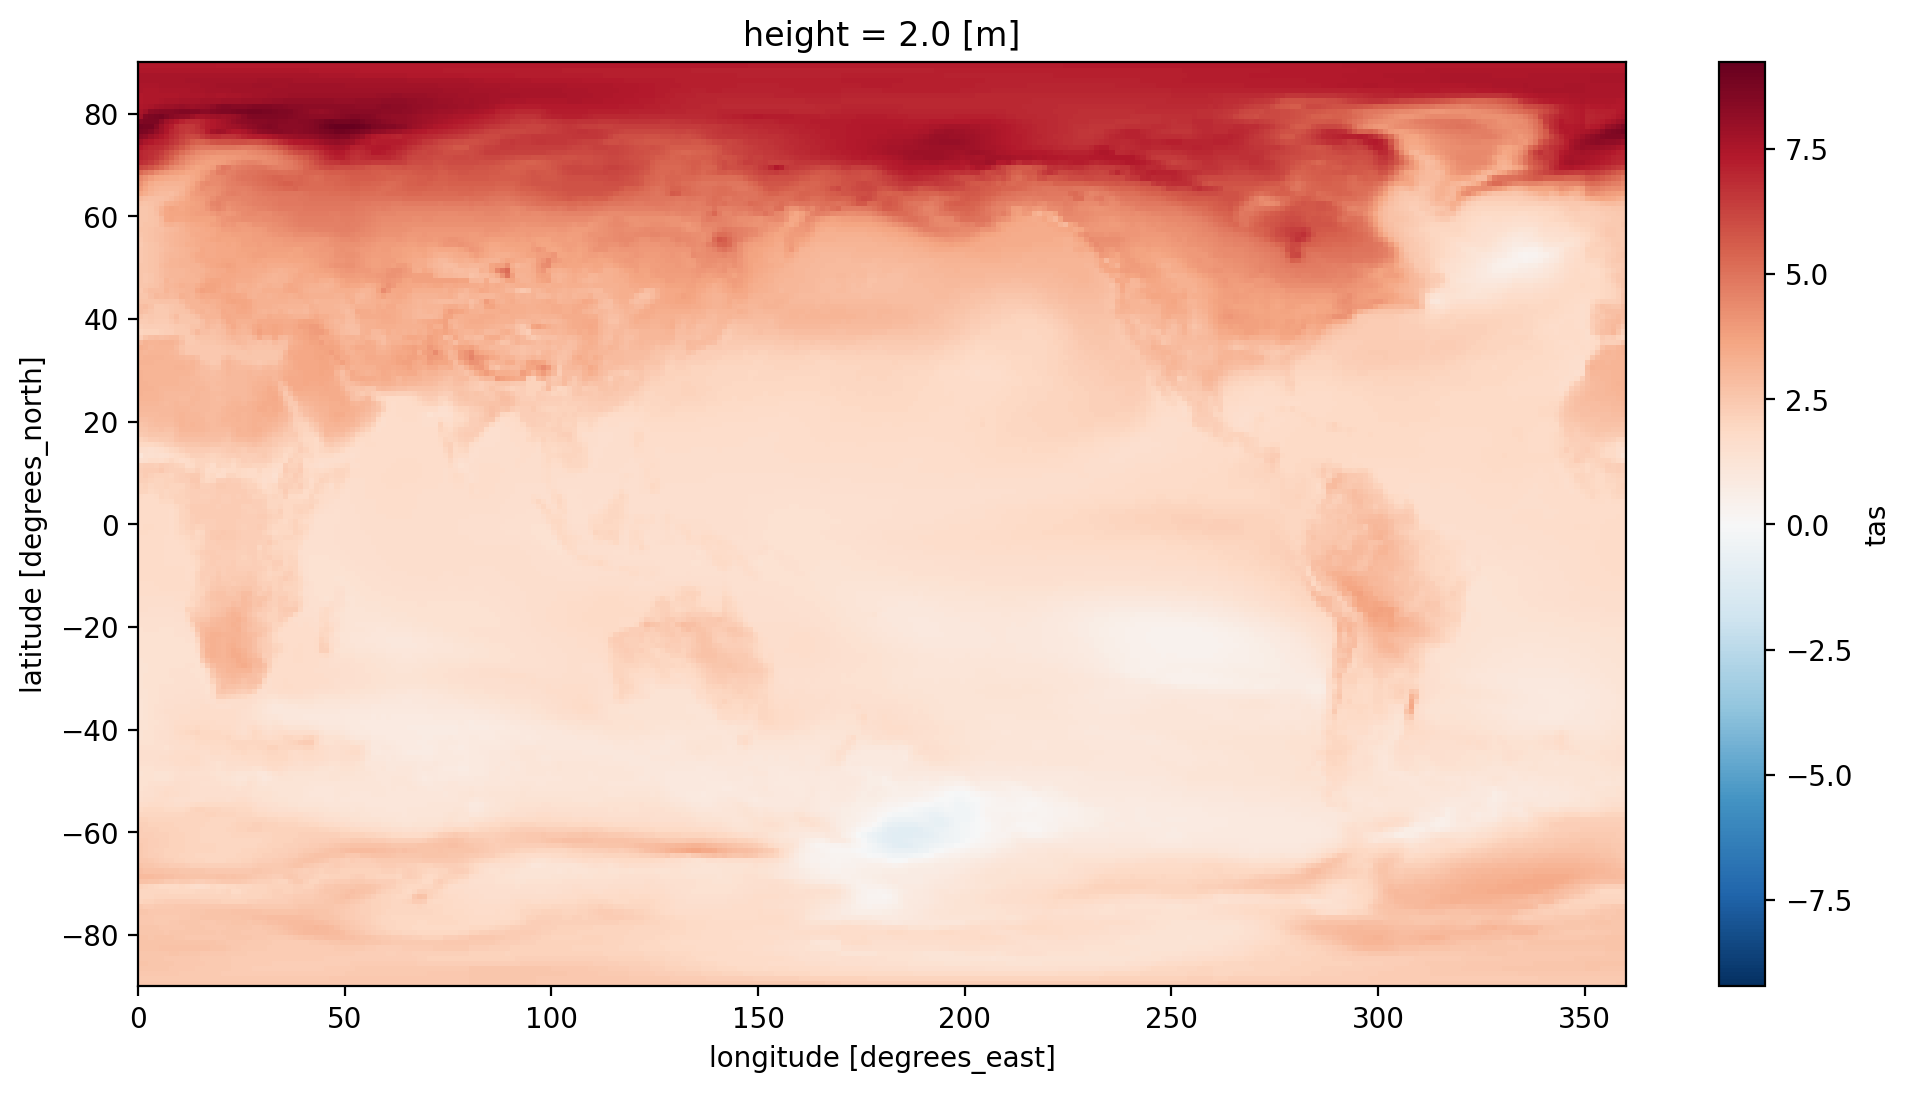

In [107]:
GFDL_CM4_diff_SSP245.plot()

In [101]:
GFDL_CM4_diff_SSP585= (GFDl_CM4_SSP585 - GFDL_CM4_baseline)

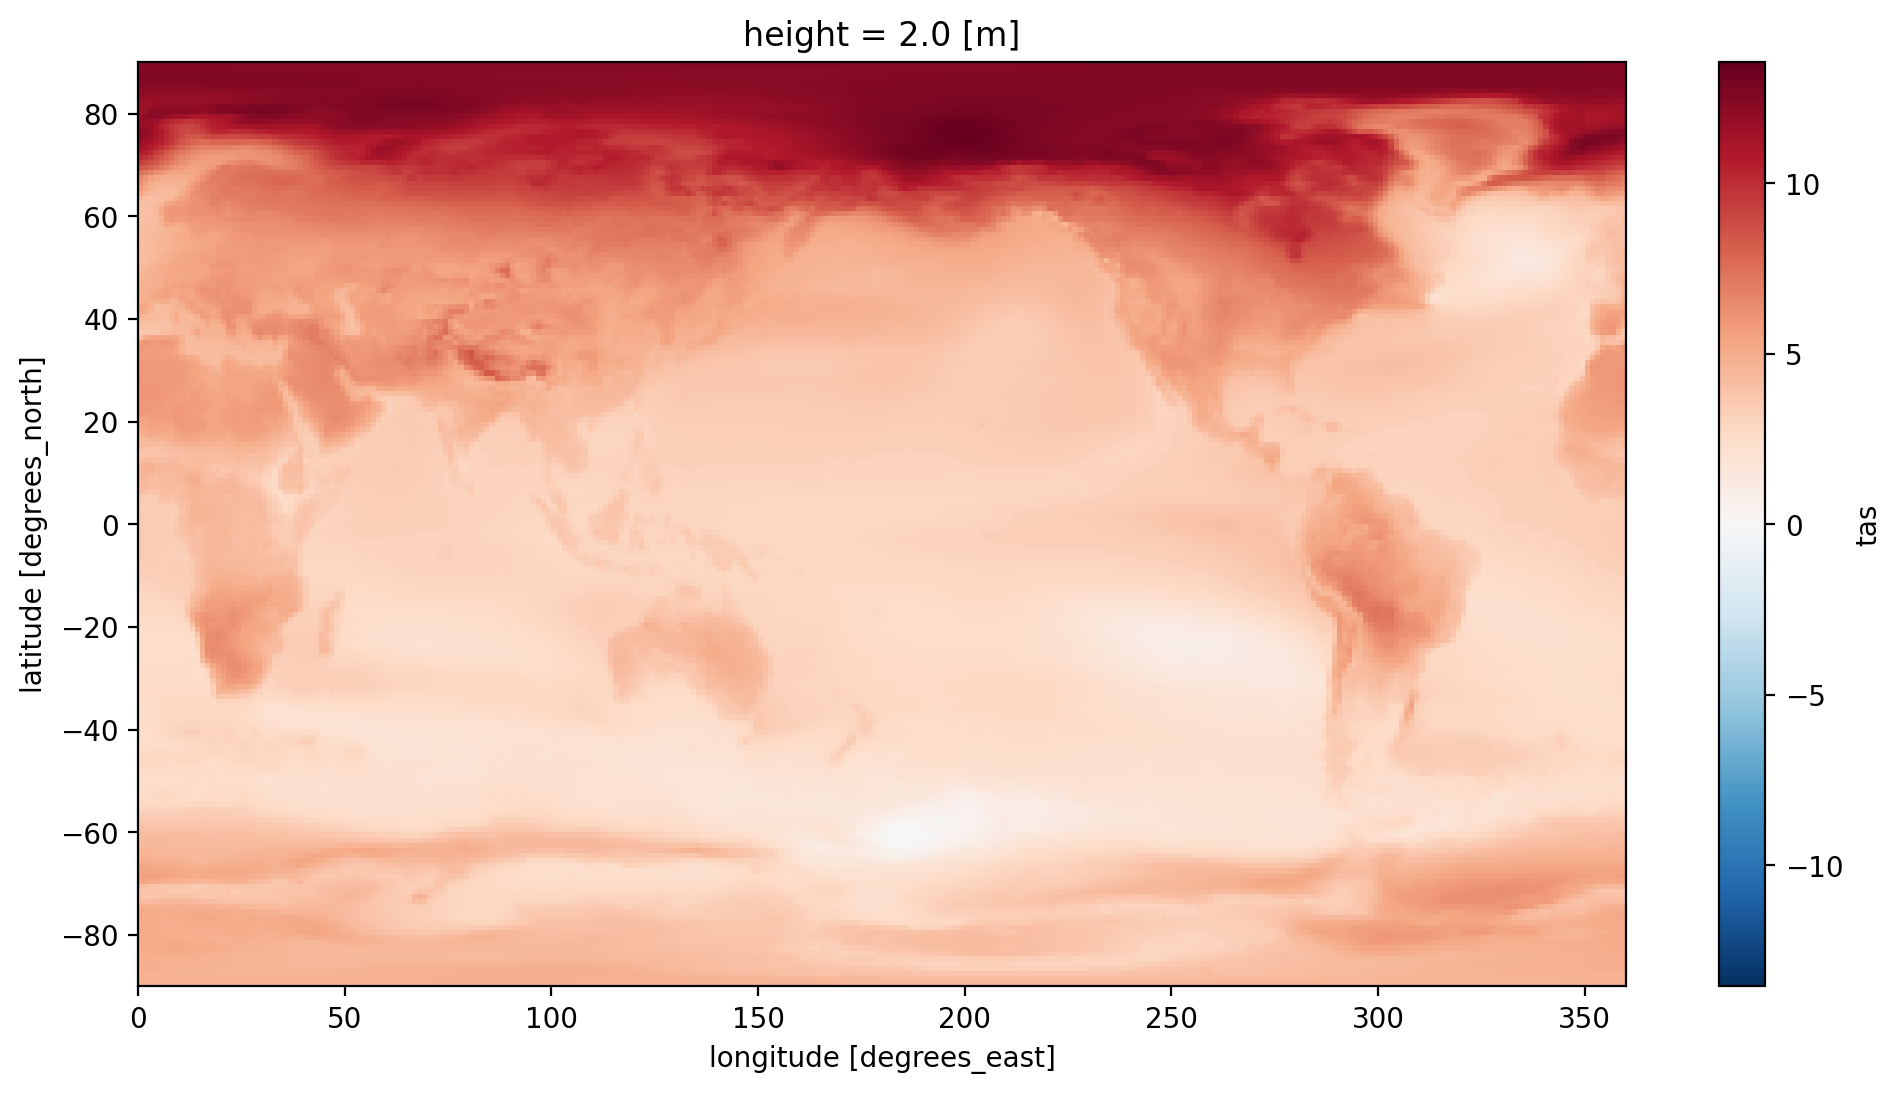

In [108]:
GFDL_CM4_diff_SSP585.plot()

In [103]:
GFDL_ESM4_diff_SSP585= (GFDl_ESM4_SSP245 - GFDL_ESM4_baseline)

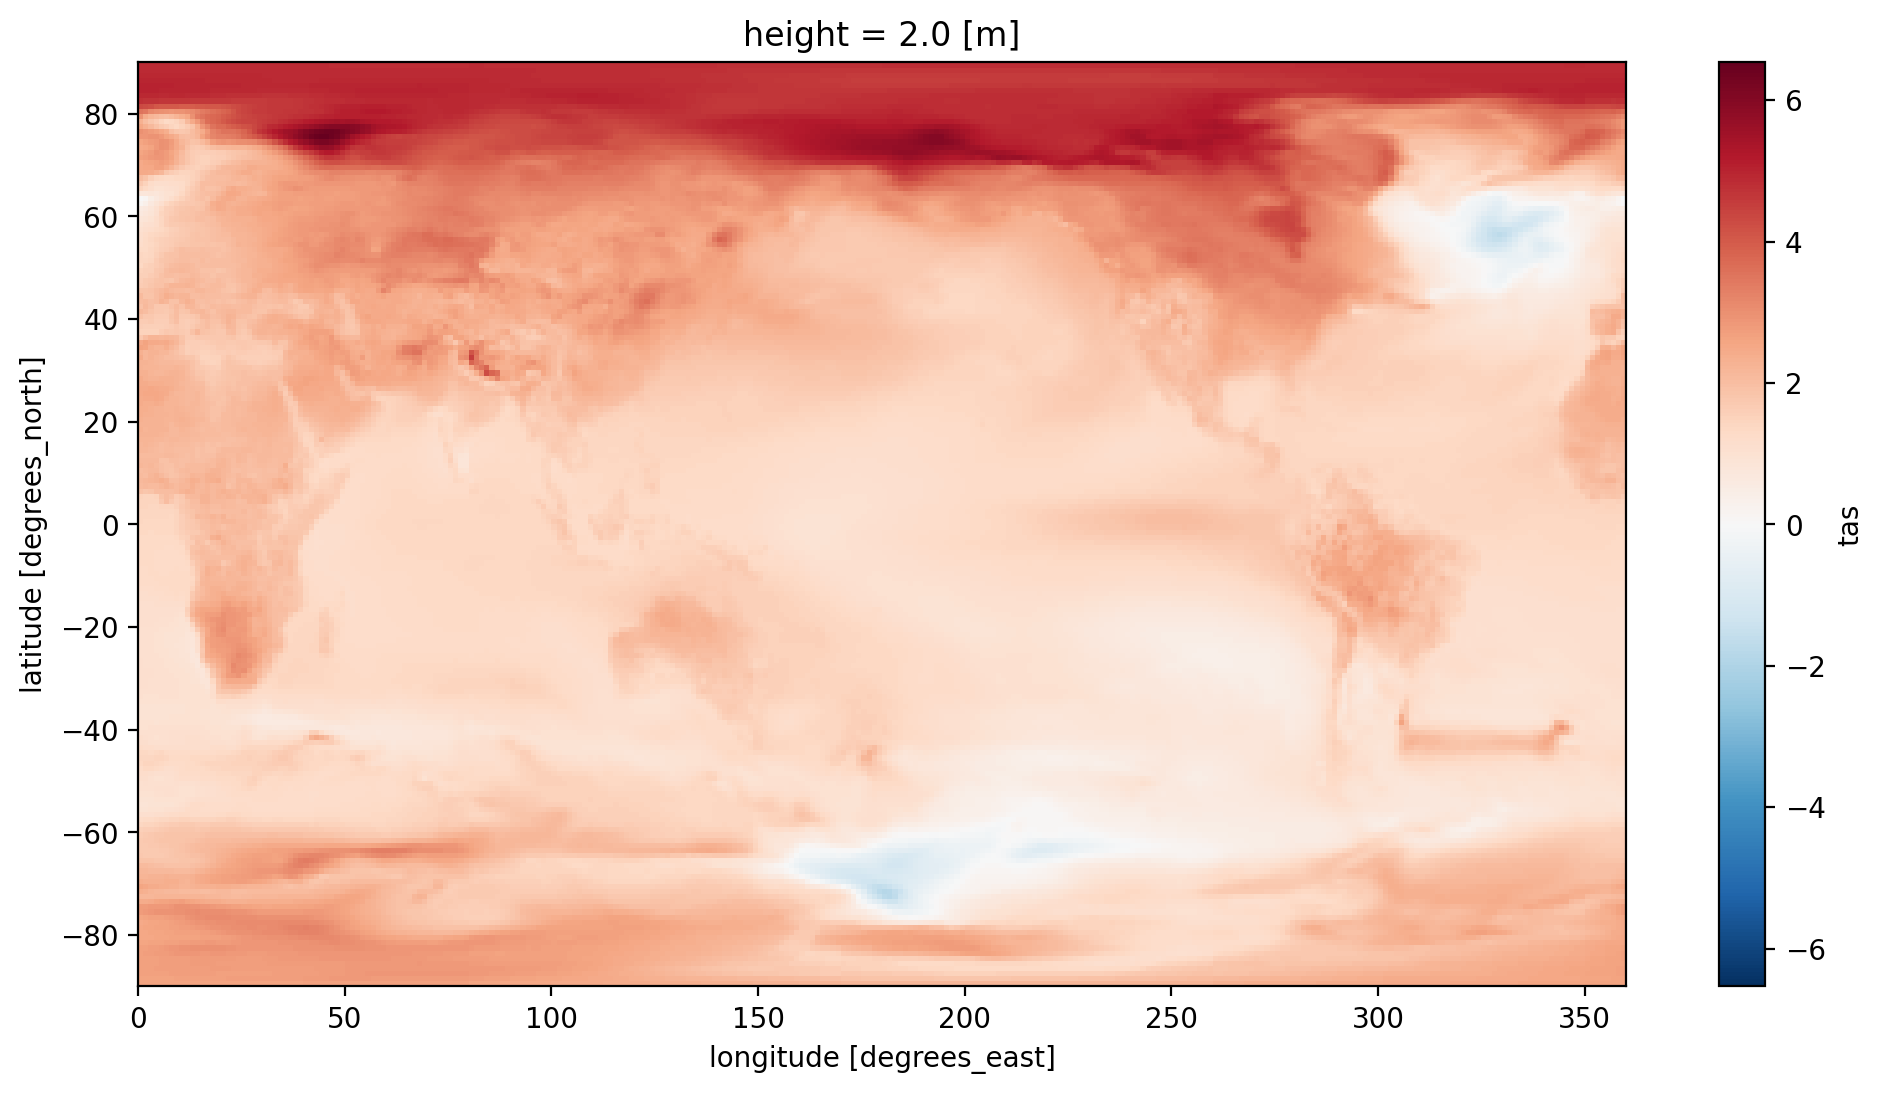

In [109]:
GFDL_ESM4_diff_SSP585.plot()

In [105]:
GFDL_ESM4_diff_SSP245= (GFDl_ESM4_SSP585 - GFDL_ESM4_baseline)

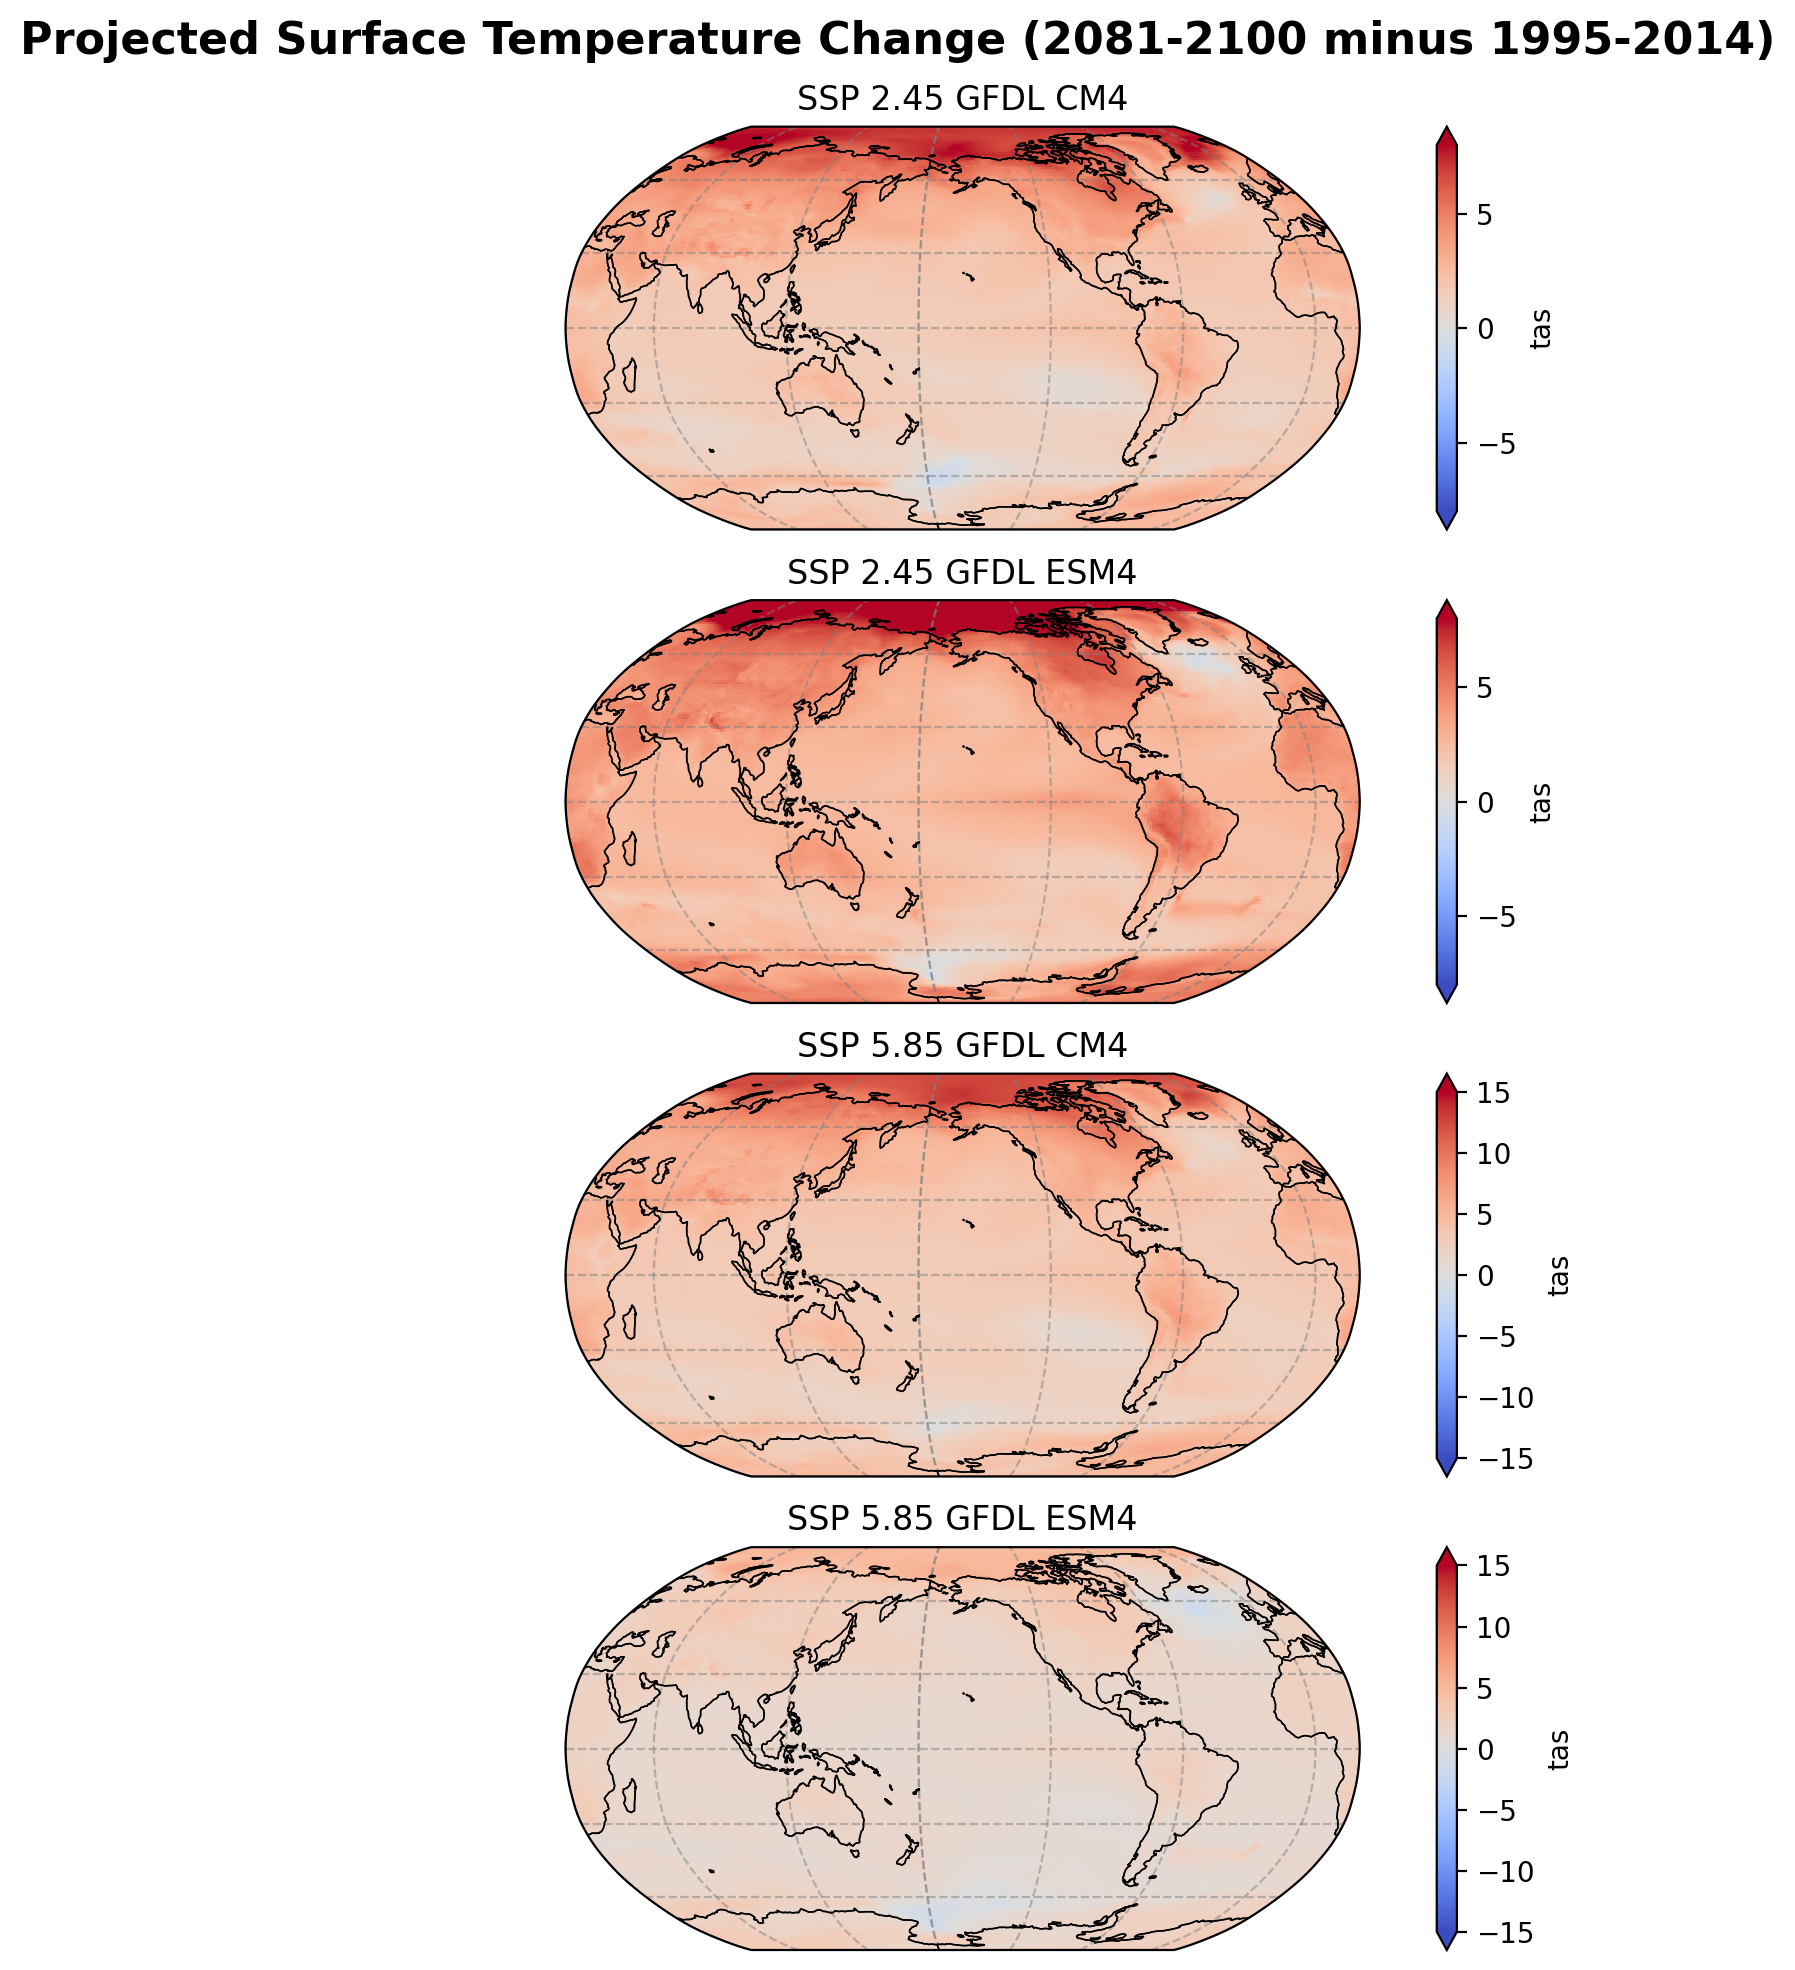

In [140]:
subplot_kws=dict(projection=ccrs.Robinson(central_longitude=-160),
                 facecolor='grey')

### set up our figure settings
fig, ax = plt.subplots(ncols=1,
                               nrows=4,
                               figsize=(8,10),
                               subplot_kw=subplot_kws) ## set up our plotting area
ax1, ax2, ax3, ax4 = ax

for ax in [ax1, ax2, ax3, ax4]:
    # Draw the actual coastlines a bit thicker
    ax.coastlines(color='black', linewidth=0.6, zorder=3)

    # explicit land polygons with outlines
    ax.add_feature(
        cfeature.LAND,
        facecolor='none',      # don't fill, just outline
        edgecolor='black',
        linewidth=0.5,
        zorder=3
    )
fig.suptitle("Projected Surface Temperature Change (2081-2100 minus 1995-2014)", 
             fontsize=16,
             fontweight='bold')

### plot our data
GFDL_CM4_diff_SSP245.plot(ax=ax1, 
                                cmap='coolwarm', 
                                vmin=-8,vmax=8, extend='both',
                                transform=ccrs.PlateCarree())

GFDL_CM4_diff_SSP585.plot(ax=ax3, 
                                cmap='coolwarm', 
                                vmin=-15,vmax=15,extend='both',
                                transform=ccrs.PlateCarree())

GFDL_ESM4_diff_SSP245.plot(ax=ax2, 
                                cmap='coolwarm', 
                                vmin=-8,vmax=8,extend='both',
                                transform=ccrs.PlateCarree())

GFDL_ESM4_diff_SSP585.plot(ax=ax4, 
                                cmap='coolwarm', 
                                vmin=-15,vmax=15,extend='both',
                                transform=ccrs.PlateCarree())
## customize our subplots
ax1.set_title('SSP 2.45 GFDL CM4')
ax3.set_title('SSP 5.85 GFDL CM4')
ax2.set_title('SSP 2.45 GFDL ESM4')
ax4.set_title('SSP 5.85 GFDL ESM4')

plt.tight_layout() ## make it look nicely spaced!

### add some gridlines 
ax1.gridlines(color='grey', alpha=0.5, linestyle='--')
ax2.gridlines(color='grey', alpha=0.5, linestyle='--')
ax3.gridlines(color='grey', alpha=0.5, linestyle='--')
ax4.gridlines(color='grey', alpha=0.5, linestyle='--')

In [87]:
gfdl_cm4_24_tos.time

<xarray.DataArray 'time' (time: 1032)>
array([cftime.DatetimeNoLeap(2015, 1, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2015, 2, 15, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2015, 3, 16, 12, 0, 0, 0, has_year_zero=True),
       ...,
       cftime.DatetimeNoLeap(2100, 10, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2100, 11, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2100, 12, 16, 12, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
    height   float64 ...
  * time     (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    axis:           T
    bounds:         time_bnds
    calendar_type:  noleap
    description:    Temporal mean
    long_name:      time
    standard_name:  time